In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
pd.set_option('display.max_columns', 250)

In [260]:
## load datasets
df_2024_teams = pd.read_csv('./Data/NCAA_MBB_teams_2024.csv', index_col=0)
stats_df = pd.read_csv('./Data/NCAA_MBB_data.csv', index_col=0)

In [261]:
df_2024_teams.head(3)

,YEAR,TEAM NO,TEAM ID,TEAM,SEED,ROUND,BADJ EM,BADJ O,BADJ D,BARTHAG,GAMES,W,L,WIN%,EFG%,EFG%D,FTR,FTRD,TOV%,TOV%D,OREB%,DREB%,OP OREB%,OP DREB%,RAW T,2PT%,2PT%D,3PT%,3PT%D,BLK%,BLKED%,AST%,OP AST%,2PTR,3PTR,2PTRD,3PTRD,BADJ T,AVG HGT,EFF HGT,EXP,TALENT,FT%,OP FT%,PPPO,PPPD,ELITE SOS,WAB,BADJ EM RANK,BADJ O RANK,BADJ D RANK,BARTHAG RANK,EFG% RANK,EFGD% RANK,FTR RANK,FTRD RANK,TOV% RANK,TOV%D RANK,OREB% RANK,DREB% RANK,OP OREB% RANK,OP DREB% RANK,RAW T RANK,2PT% RANK,2PT%D RANK,3PT% RANK,3PT%D RANK,BLK% RANK,BLKED% RANK,AST% RANK,OP AST% RANK,2PTR RANK,3PTR RANK,2PTRD RANK,3PTRD RANK,BADJT RANK,AVG HGT RANK,EFF HGT RANK,EXP RANK,TALENT RANK,FT% RANK,OP FT% RANK,PPPO RANK,PPPD RANK,ELITE SOS RANK
0,2024,1079,2,Akron,14,0,4.3,109.1,104.8,0.614,13,7,6,53.846154,52.8,50.5,29.1,34.3,16.9,16.3,30.0,74.0,26.0,70.0,66.7,54.8,53.0,33.3,30.9,6.2,7.9,43.0,50.8,59.1,40.9,62.0,38.0,66.7,76.791,79.973,2.584,10.970,73.4,71.4,1.095,1.046,15.936,-3.1,119,100,153,119,53,100,221,168,145,174,128,56,56,128,275,19,229,177,36,299,42,293,123,273,96,165,201,275,238,199,19,176,122,132,47,74,290
1,2024,1078,3,Alabama,4,0,16.0,124.5,108.5,0.830,10,5,5,50.000000,54.3,55.2,35.7,48.9,16.5,14.4,34.1,68.9,31.1,65.9,75.2,57.1,55.1,33.6,36.8,7.7,14.8,43.9,49.0,57.8,42.2,65.7,34.3,73.8,78.211,82.480,2.094,27.836,76.9,76.8,1.161,1.199,54.469,1.4,25,3,239,31,22,322,54,354,120,294,41,246,246,41,5,6,314,162,282,223,353,274,74,297,68,296,73,12,33,8,156,106,36,332,8,354,15
2,2024,1077,8,Arizona,2,0,24.1,123.6,99.5,0.924,11,7,4,63.636364,53.1,52.3,37.6,34.0,15.9,16.4,34.1,75.1,24.9,65.9,72.2,52.8,49.5,35.8,38.2,6.2,11.7,53.3,52.6,67.9,32.1,64.8,35.2,72.5,78.063,81.464,1.963,76.342,71.7,73.5,1.147,1.070,42.102,1.8,6,5,51,9,45,206,33,161,87,167,41,31,31,41,34,57,78,64,321,299,302,60,167,68,298,262,102,23,50,37,196,7,179,235,12,117,71


In [262]:
stats_df.tail(3)

,DATE,TEAM,CONF.,OPP.,RESULT,SCORE,YEAR,SEED,ROUND,POWER RATING,POWER RATING RANK,BADJ EM,BADJ O,BADJ D,BARTHAG,GAMES,W,L,WIN%,EFG%,EFG%D,FTR,FTRD,TOV%,TOV%D,OREB%,DREB%,OP OREB%,OP DREB%,RAW T,2PT%,2PT%D,3PT%,3PT%D,BLK%,BLKED%,AST%,OP AST%,2PTR,3PTR,2PTRD,3PTRD,BADJ T,AVG HGT,EFF HGT,EXP,TALENT,FT%,OP FT%,PPPO,PPPD,ELITE SOS,WAB,BADJ EM RANK,BADJ O RANK,BADJ D RANK,BARTHAG RANK,EFG% RANK,EFGD% RANK,FTR RANK,FTRD RANK,TOV% RANK,TOV%D RANK,OREB% RANK,DREB% RANK,OP OREB% RANK,OP DREB% RANK,RAW T RANK,2PT% RANK,2PT%D RANK,3PT% RANK,3PT%D RANK,BLK% RANK,BLKED% RANK,AST% RANK,OP AST% RANK,2PTR RANK,3PTR RANK,2PTRD RANK,3PTRD RANK,BADJT RANK,AVG HGT RANK,EFF HGT RANK,EXP RANK,TALENT RANK,FT% RANK,OP FT% RANK,PPPO RANK,PPPD RANK,ELITE SOS RANK,TEAM_opp,SEED_opp,ROUND_opp,POWER RATING_opp,POWER RATING RANK_opp,BADJ EM_opp,BADJ O_opp,BADJ D_opp,BARTHAG_opp,GAMES_opp,W_opp,L_opp,WIN%_opp,EFG%_opp,EFG%D_opp,FTR_opp,FTRD_opp,TOV%_opp,TOV%D_opp,OREB%_opp,DREB%_opp,OP OREB%_opp,OP DREB%_opp,RAW T_opp,2PT%_opp,2PT%D_opp,3PT%_opp,3PT%D_opp,BLK%_opp,BLKED%_opp,AST%_opp,OP AST%_opp,2PTR_opp,3PTR_opp,2PTRD_opp,3PTRD_opp,BADJ T_opp,AVG HGT_opp,EFF HGT_opp,EXP_opp,TALENT_opp,FT%_opp,OP FT%_opp,PPPO_opp,PPPD_opp,ELITE SOS_opp,WAB_opp,BADJ EM RANK_opp,BADJ O RANK_opp,BADJ D RANK_opp,BARTHAG RANK_opp,EFG% RANK_opp,EFGD% RANK_opp,FTR RANK_opp,FTRD RANK_opp,TOV% RANK_opp,TOV%D RANK_opp,OREB% RANK_opp,DREB% RANK_opp,OP OREB% RANK_opp,OP DREB% RANK_opp,RAW T RANK_opp,2PT% RANK_opp,2PT%D RANK_opp,3PT% RANK_opp,3PT%D RANK_opp,BLK% RANK_opp,BLKED% RANK_opp,AST% RANK_opp,OP AST% RANK_opp,2PTR RANK_opp,3PTR RANK_opp,2PTRD RANK_opp,3PTRD RANK_opp,BADJT RANK_opp,AVG HGT RANK_opp,EFF HGT RANK_opp,EXP RANK_opp,TALENT RANK_opp,FT% RANK_opp,OP FT% RANK_opp,PPPO RANK_opp,PPPD RANK_opp,ELITE SOS RANK_opp,SEED_DIFF
449,2023-04-01,Florida Atlantic,CUSA,San Diego St.,L,72-71,2023,9,4,82.6,246,12.9,109.8,96.9,0.808,14,11,3,78.57143,53.4,45.9,27.7,30.4,16.5,15.9,29.1,75.6,24.4,70.9,68.5,50.6,45.1,38.0,31.7,5.8,10.0,51.0,35.1,57.0,43.0,67.2,32.8,68.7,76.040,79.224,2.036,17.083,68.8,77.9,1.098,0.977,22.733,1.6,43,61,50,43,30,7,231,122,59,273,139,26,26,139,144,108,14,27,45,296,207,119,1,315,52,319,46,143,324,296,168,141,251,345,18,15,166,San Diego St.,5,2,86.0,136,17.1,111.3,94.2,0.872,10,8,2,80.00000,50.1,49.8,29.9,31.8,18.6,18.5,33.1,73.5,26.5,66.9,64.1,45.9,52.3,38.7,31.0,12.0,10.1,48.4,53.1,65.5,34.5,56.7,43.3,64.6,76.704,80.193,2.718,37.236,75.0,76.8,1.062,1.011,35.035,2.9,20,38,22,19,135,93,160,154,168,112,40,79,79,40,338,293,203,17,32,23,214,179,182,109,256,38,328,329,240,152,10,84,65,327,49,57,89,4
450,2023-04-01,Connecticut,BE,Miami FL,W,72-59,2023,4,1,89.2,57,21.9,115.6,93.7,0.918,11,6,5,54.54545,49.5,46.4,23.6,42.3,19.8,16.3,40.3,72.4,27.6,59.7,67.0,49.3,45.6,33.2,32.1,14.4,9.6,62.2,48.8,60.1,39.9,68.3,31.7,66.0,78.308,81.025,1.724,62.486,77.5,73.6,1.080,1.009,43.039,1.2,7,20,18,7,173,13,326,329,255,247,1,122,122,1,236,165,16,180,59,5,174,7,78,255,110,337,30,272,28,62,274,23,22,219,31,53,53,Miami FL,5,4,83.6,210,20.5,113.5,93.0,0.908,11,7,4,63.63636,52.5,47.8,31.4,22.5,17.5,17.1,29.1,71.3,28.7,70.9,68.8,52.3,49.8,35.3,29.6,8.0,11.0,46.0,47.2,65.2,34.8,62.6,37.4,69.1,76.786,79.358,2.099,44.964,75.2,73.7,1.081,0.992,36.645,1.4,8,27,12,9,50,31,116,6,105,198,139,165,165,139,127,56,99,87,15,165,262,240,52,115,249,180,188,119,222,268,155,63,58,226,29,26,81,-1
451,2023-04-03,Connecticut,BE,San Diego St.,W,76-59,2023,4,1,89.2,57,21.9,115.6,93.7,0.918,11,6,5,54.54545,49.5,46.4,23.6,42.3,19.8,16.3,40.3,72.4,27.6,59.7,67.0,49.3,45.6,33.2,32.1,14.4,9.6,62.2,48.8,60.1,39.9,68.3,31.7,66.0,78.308,81.025,1.724,62.486,77.5,73.6,1.080,1.009,43.039,1.2,7,20,18,7,173,13,326,329,255,247,1,122,122,1,236,165,16,180,59,5,174,7,78,255,110,337,30,272,28,62,274,23,22,219,31,53,53,San Diego St.,5,2,86.0,136,17.1,111.3,94.2,0.872,10,8,2,80.00000,50.1,49.8,29.9,31.8,18.6,18.5,33.1,73.5,26.5,66.9,64.1,45.9,52.3,38.7,31.0,12.0,10.1,48.4,53.1,65.5,34.5,56.7,43.3,64.6,76.704,80.193,2.718,37.236,75

In [263]:
#stats_df.columns.to_list()

## Predicting Outcomes using XGBoost Classifier

+ Prepare the data, create and train the XGBoost model, select relevant features for predicition, predict results

+ The purpose of aligning all teams against each other is to create a comprehensive dataset that includes all possible matchups between the teams.
+ By merging the 2024 data with itself, the code generates a DataFrame where each row represents a unique matchup between two teams.

In [264]:
# Rename columns in stats_df to match the format in merged_2024_data
stats_df = stats_df.rename(columns={
    'BARTHAG': 'BARTHAG_team1',
    'EFG%': 'EFG%_team1',
    'EFG%D': 'EFG%D_team1',
    'FTR': 'FTR_team1',
    'FTRD': 'FTRD_team1',
    'TOV%': 'TOV%_team1',
    'TOV%D': 'TOV%D_team1',
    'OREB%': 'OREB%_team1',
    'DREB%': 'DREB%_team1',
    'OP OREB%': 'OP OREB%_team1',
    'OP DREB%': 'OP DREB%_team1',
    'BARTHAG_opp': 'BARTHAG_team2',
    'EFG%_opp': 'EFG%_team2',
    'EFG%D_opp': 'EFG%D_team2',
    'FTR_opp': 'FTR_team2',
    'FTRD_opp': 'FTRD_team2',
    'TOV%_opp': 'TOV%_team2',
    'TOV%D_opp': 'TOV%D_team2',
    'OREB%_opp': 'OREB%_team2',
    'DREB%_opp': 'DREB%_team2',
    'OP OREB%_opp': 'OP OREB%_team2',
    'OP DREB%_opp': 'OP DREB%_team2',
    'BADJ EM': 'BADJ EM_team1',
    'BADJ O': 'BADJ O_team1',
    'BADJ D': 'BADJ D_team1',
    'TALENT': 'TALENT_team1',
    'EXP': 'EXP_team1',
    'PPPO': 'PPPO_team1',
    'PPPD': 'PPPD_team1',
    'ELITE SOS': 'ELITE SOS_team1',
    'BADJ EM_opp': 'BADJ EM_team2',
    'BADJ O_opp': 'BADJ O_team2',
    'BADJ D_opp': 'BADJ D_team2',
    'TALENT_opp': 'TALENT_team2',
    'EXP_opp': 'EXP_team2',
    'PPPO_opp': 'PPPO_team2',
    'PPPD_opp': 'PPPD_team2',
    'ELITE SOS_opp': 'ELITE SOS_team2'
})

# Select relevant features for training from stats_df
train_features = ['BARTHAG_team1', 'EFG%_team1', 'EFG%D_team1', 'FTR_team1', 'FTRD_team1', 'TOV%_team1', 'TOV%D_team1', 'OREB%_team1', 'DREB%_team1', 'OP OREB%_team1', 'OP DREB%_team1',
                  'BARTHAG_team2', 'EFG%_team2', 'EFG%D_team2', 'FTR_team2', 'FTRD_team2', 'TOV%_team2', 'TOV%D_team2', 'OREB%_team2', 'DREB%_team2', 'OP OREB%_team2', 'OP DREB%_team2',
                  'BADJ EM_team1', 'BADJ O_team1', 'BADJ D_team1', 'TALENT_team1', 'EXP_team1', 'PPPO_team1', 'PPPD_team1', 'ELITE SOS_team1',
                  'BADJ EM_team2', 'BADJ O_team2', 'BADJ D_team2','TALENT_team2', 'EXP_team2', 'PPPO_team2', 'PPPD_team2', 'ELITE SOS_team2']

# Convert 'RESULT' to binary values
stats_df['RESULT'] = stats_df['RESULT'].map({'L': 0, 'W': 1})

# Drop rows with missing values in the 'RESULT' column
stats_df = stats_df.dropna(subset=['RESULT'])

# Prepare the training data
X_train = stats_df[train_features + ['SEED_DIFF']]
y_train = stats_df['RESULT']

# Create and train the XGBoost model
model = XGBClassifier(n_estimators=1000, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Merge the 2024 data with itself to create all possible matchups
merged_2024_data = pd.merge(df_2024_teams, df_2024_teams, how='cross', suffixes=('_team1', '_team2'))

# Select relevant features for prediction from merged_2024_data
pred_features = ['BARTHAG_team1', 'EFG%_team1', 'EFG%D_team1', 'FTR_team1', 'FTRD_team1', 'TOV%_team1', 'TOV%D_team1', 'OREB%_team1', 'DREB%_team1', 'OP OREB%_team1', 'OP DREB%_team1',
                 'BARTHAG_team2', 'EFG%_team2', 'EFG%D_team2', 'FTR_team2', 'FTRD_team2', 'TOV%_team2', 'TOV%D_team2', 'OREB%_team2', 'DREB%_team2', 'OP OREB%_team2', 'OP DREB%_team2',
                 'BADJ EM_team1', 'BADJ O_team1', 'BADJ D_team1', 'TALENT_team1', 'EXP_team1', 'PPPO_team1', 'PPPD_team1', 'ELITE SOS_team1',
                 'BADJ EM_team2', 'BADJ O_team2', 'BADJ D_team2', 'TALENT_team2', 'EXP_team2', 'PPPO_team2', 'PPPD_team2', 'ELITE SOS_team2']

# Prepare the 2024 data for prediction
merged_2024_data['SEED_DIFF'] = merged_2024_data['SEED_team1'] - merged_2024_data['SEED_team2']
X_pred = merged_2024_data[pred_features + ['SEED_DIFF']]

# Predict the 2024 tournament outcomes
merged_2024_data['PREDICTED_RESULT'] = model.predict(X_pred)
merged_2024_data_short = merged_2024_data[['TEAM_team1', 'TEAM_team2', 'PREDICTED_RESULT']]

In [265]:
merged_2024_data_short

,TEAM_team1,TEAM_team2,PREDICTED_RESULT
0,Akron,Akron,1
1,Akron,Alabama,0
2,Akron,Arizona,0
3,Akron,Auburn,0
4,Akron,Baylor,0
...,...,...,...
4619,Yale,Wagner,1
4620,Yale,Washington St.,1
4621,Yale,Western Kentucky,1
4622,Yale,Wisconsin,1


In [266]:
predicted_results = merged_2024_data[['YEAR_team1', 'TEAM NO_team1', 'TEAM ID_team1', 'TEAM_team1',
       'SEED_team1', 'ROUND_team1', 'BADJ EM_team1', 'BADJ O_team1','BADJ D_team1', 'BARTHAG_team1','YEAR_team2','TEAM NO_team2','TEAM ID_team2','TEAM_team2','SEED_team2','ROUND_team2','BADJ EM_team2','BADJ O_team2','BADJ D_team2','BARTHAG_team2','PREDICTED_RESULT']]
predicted_df = predicted_results[predicted_results['TEAM_team2'] != predicted_results['TEAM_team1']]
predicted_df = predicted_df[['YEAR_team1','TEAM_team1','SEED_team1','TEAM_team2','SEED_team2','PREDICTED_RESULT']]
predicted_df

,YEAR_team1,TEAM_team1,SEED_team1,TEAM_team2,SEED_team2,PREDICTED_RESULT
1,2024,Akron,14,Alabama,4,0
2,2024,Akron,14,Arizona,2,0
3,2024,Akron,14,Auburn,4,0
4,2024,Akron,14,Baylor,3,0
5,2024,Akron,14,Boise St.,10,0
...,...,...,...,...,...,...
4618,2024,Yale,13,Virginia,10,1
4619,2024,Yale,13,Wagner,16,1
4620,2024,Yale,13,Washington St.,7,1
4621,2024,Yale,13,Western Kentucky,15,1


Feature Importances:
            Feature  Importance
38        SEED_DIFF    0.142911
11    BARTHAG_team2    0.075088
0     BARTHAG_team1    0.044143
33     TALENT_team2    0.036315
29  ELITE SOS_team1    0.036186
3         FTR_team1    0.035432
24     BADJ D_team1    0.035154
1        EFG%_team1    0.032420
4        FTRD_team1    0.031465
31     BADJ O_team2    0.028398
14        FTR_team2    0.028174
37  ELITE SOS_team2    0.028060
7       OREB%_team1    0.026778
15       FTRD_team2    0.026401
27       PPPO_team1    0.026372
23     BADJ O_team1    0.026040
36       PPPD_team2    0.025781
22    BADJ EM_team1    0.024362
6       TOV%D_team1    0.024028
18      OREB%_team2    0.023553
35       PPPO_team2    0.021940
25     TALENT_team1    0.020859
8       DREB%_team1    0.020022
32     BADJ D_team2    0.019960
26        EXP_team1    0.019807
2       EFG%D_team1    0.019175
17      TOV%D_team2    0.017068
5        TOV%_team1    0.016810
34        EXP_team2    0.015023
16       TOV%_team2

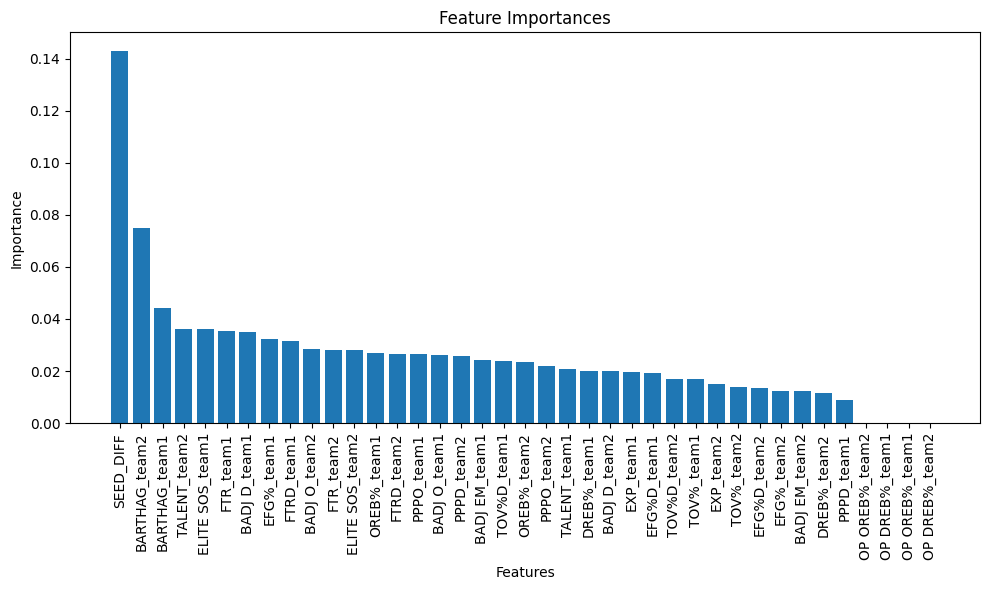

In [267]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame with feature importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Print the feature importances
print("Feature Importances:")
print(feature_importances)

# Visualize the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [279]:
def simulate_next_round(current_round_df):
    next_round_matchups = []
    for i in range(0, len(current_round_df), 2):
        team_1 = current_round_df.iloc[i]['Winner']
        team_2 = current_round_df.iloc[i+1]['Winner']
        next_round_matchups.append((team_1, team_2))
    
    next_round_df = pd.DataFrame(next_round_matchups, columns=['Team_1', 'Team_2'])
    return next_round_df



# Define the first-round matchups
first_round_matchups = [
    ('Connecticut', 'Stetson'),
    ('Florida Atlantic', 'Northwestern'),
    ('San Diego St.', 'UAB'),
    ('Auburn', 'Yale'),
    ('BYU', 'Duquesne'),
    ('Illinois', 'Morehead St.'),
    ('Washington St.', 'Drake'),
    ('Iowa St.', 'South Dakota St.'),
    ('North Carolina', 'Wagner'),
    ('Mississippi St.', 'Michigan St.'),
    ('Saint Mary\'s', 'Grand Canyon'),
    ('Alabama', 'College of Charleston'),
    ('Clemson', 'New Mexico'),
    ('Baylor', 'Colgate'),
    ('Dayton', 'Nevada'),
    ('Arizona', 'Long Beach St.'),
    ('Houston', 'Longwood'),
    ('Nebraska', 'Texas A&M'),
    ('Wisconsin', 'James Madison'),
    ('Duke', 'Vermont'),
    ('Texas Tech', 'North Carolina St.'),
    ('Kentucky', 'Oakland'),
    ('Florida', 'Colorado'),
    ('Marquette', 'Western Kentucky'),
    ('Purdue', 'Montana St.'),
    ('Utah St.', 'TCU'),
    ('Gonzaga', 'McNeese St.'),
    ('Kansas', 'Samford'),
    ('South Carolina', 'Oregon'),
    ('Creighton', 'Akron'),
    ('Texas', 'Colorado St.'),
    ('Tennessee', 'Saint Peter\'s')
]

first_round_df = pd.DataFrame(first_round_matchups, columns=['Team_1', 'Team_2'])

# Merge first_round_df with df_2024_teams to get team statistics
merged_first_round = pd.merge(first_round_df, df_2024_teams, left_on='Team_1', right_on='TEAM')
merged_first_round = pd.merge(merged_first_round, df_2024_teams, left_on='Team_2', right_on='TEAM', suffixes=('_team1', '_team2'))

# Calculate SEED_DIFF for the first-round matchups
merged_first_round['SEED_DIFF'] = merged_first_round['SEED_team1'] - merged_first_round['SEED_team2']

# Select relevant features for prediction, including SEED_DIFF
pred_features = ['BARTHAG_team1', 'EFG%_team1', 'EFG%D_team1', 'FTR_team1', 'FTRD_team1', 'TOV%_team1', 'TOV%D_team1', 'OREB%_team1', 'DREB%_team1', 'OP OREB%_team1', 'OP DREB%_team1',
                 'BARTHAG_team2', 'EFG%_team2', 'EFG%D_team2', 'FTR_team2', 'FTRD_team2', 'TOV%_team2', 'TOV%D_team2', 'OREB%_team2', 'DREB%_team2', 'OP OREB%_team2', 'OP DREB%_team2',
                 'BADJ EM_team1', 'BADJ O_team1', 'BADJ D_team1', 'TALENT_team1', 'EXP_team1', 'PPPO_team1', 'PPPD_team1', 'ELITE SOS_team1',
                 'BADJ EM_team2', 'BADJ O_team2', 'BADJ D_team2', 'TALENT_team2', 'EXP_team2', 'PPPO_team2', 'PPPD_team2', 'ELITE SOS_team2',
                 'SEED_DIFF']

# Prepare input features for prediction, including SEED_DIFF
X_first_round = merged_first_round[pred_features]

# Predict the outcome of each first-round matchup
first_round_predictions = model.predict(X_first_round)

# Update first_round_df with predicted winners
first_round_df['Winner'] = np.where(first_round_predictions == 1, first_round_df['Team_1'], first_round_df['Team_2'])

# Simulate the tournament rounds
current_round = first_round_df
round_number = 1

while len(current_round) > 1:
    print(f"Round {round_number} Matchups:")
    print(current_round[['Team_1', 'Team_2', 'Winner']])
    print()

    # Merge current round matchups with df_2024_teams to get team statistics
    merged_round = pd.merge(current_round, df_2024_teams, left_on='Team_1', right_on='TEAM')
    merged_round = pd.merge(merged_round, df_2024_teams, left_on='Team_2', right_on='TEAM', suffixes=('_team1', '_team2'))

     # Calculate SEED_DIFF for the current round matchups
    merged_round['SEED_DIFF'] = merged_round['SEED_team1'] - merged_round['SEED_team2']
    
    # Prepare input features for prediction
    X_round = merged_round[pred_features]

    # Predict the outcome of each matchup in the current round
    round_predictions = model.predict(X_round)

    # Create a new DataFrame for the next round
    next_round_data = []

    # Populate the next round DataFrame with winners from the current round
    for i in range(0, len(current_round), 2):
        team_1 = current_round.iloc[i]['Winner']
        team_2 = current_round.iloc[i+1]['Winner']
        winner = team_1 if round_predictions[i//2] == 1 else team_2
        next_round_data.append({'Team_1': team_1, 'Team_2': team_2, 'Winner': winner})

    next_round_df = pd.DataFrame(next_round_data)

    # Update current_round for the next iteration
    current_round = next_round_df
    round_number += 1

print("Championship Game:")
print(current_round[['Team_1', 'Team_2', 'Winner']])
print()

# Predict the winner of the championship game
championship_game = current_round.copy()
merged_championship = pd.merge(championship_game, df_2024_teams, left_on='Team_1', right_on='TEAM')
merged_championship = pd.merge(merged_championship, df_2024_teams, left_on='Team_2', right_on='TEAM', suffixes=('_team1', '_team2'))
merged_championship['SEED_DIFF'] = merged_championship['SEED_team1'] - merged_championship['SEED_team2']

X_championship = merged_championship[pred_features]
championship_prediction = model.predict(X_championship)
championship_game['Winner'] = np.where(championship_prediction == 1, championship_game['Team_1'], championship_game['Team_2'])

print("Predicted Champion:")
print(championship_game['Winner'].values[0])

Round 1 Matchups:
              Team_1                 Team_2           Winner
0        Connecticut                Stetson      Connecticut
1   Florida Atlantic           Northwestern     Northwestern
2      San Diego St.                    UAB    San Diego St.
3             Auburn                   Yale           Auburn
4                BYU               Duquesne              BYU
5           Illinois           Morehead St.         Illinois
6     Washington St.                  Drake   Washington St.
7           Iowa St.       South Dakota St.         Iowa St.
8     North Carolina                 Wagner   North Carolina
9    Mississippi St.           Michigan St.  Mississippi St.
10      Saint Mary's           Grand Canyon     Saint Mary's
11           Alabama  College of Charleston          Alabama
12           Clemson             New Mexico          Clemson
13            Baylor                Colgate           Baylor
14            Dayton                 Nevada           Dayton
15    

## Predicting Scores using XGBoost Regressor

In [269]:
# Extract the scores for each team from the 'SCORE' column
stats_df[['SCORE_team1', 'SCORE_team2']] = stats_df['SCORE'].str.extract(r'(\d+)-(\d+)')

# Convert the scores to numeric type
stats_df['SCORE_team1'] = pd.to_numeric(stats_df['SCORE_team1'])
stats_df['SCORE_team2'] = pd.to_numeric(stats_df['SCORE_team2'])

# Calculate the score difference
stats_df['SCORE_DIFF'] = stats_df['SCORE_team1'] - stats_df['SCORE_team2']

In [270]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the training data for score prediction
X_train_score = stats_df[pred_features]
y_train_score_team1 = stats_df['SCORE_team1']
y_train_score_team2 = stats_df['SCORE_team2']

# Train separate regression models for each team's score
model_score_team1 = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_score_team1.fit(X_train_score, y_train_score_team1)

model_score_team2 = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_score_team2.fit(X_train_score, y_train_score_team2)


# Evaluate the score prediction model
score_predictions = model_score.predict(X_val)
mse = mean_squared_error(y_val, score_predictions)
print(f"Mean Squared Error (MSE) for score prediction: {mse}")

Mean Squared Error (MSE) for score prediction: 67.62064892056384


In [271]:
def simulate_next_round(current_round_df):
    next_round_matchups = []
    for i in range(0, len(current_round_df), 2):
        team_1 = current_round_df.iloc[i]['Winner']
        team_2 = current_round_df.iloc[i+1]['Winner']
        next_round_matchups.append((team_1, team_2))
    
    next_round_df = pd.DataFrame(next_round_matchups, columns=['Team_1', 'Team_2'])
    return next_round_df



# Define the first-round matchups
first_round_matchups = [
    ('Connecticut', 'Stetson'),
    ('Florida Atlantic', 'Northwestern'),
    ('San Diego St.', 'UAB'),
    ('Auburn', 'Yale'),
    ('BYU', 'Duquesne'),
    ('Illinois', 'Morehead St.'),
    ('Washington St.', 'Drake'),
    ('Iowa St.', 'South Dakota St.'),
    ('North Carolina', 'Wagner'),
    ('Mississippi St.', 'Michigan St.'),
    ('Saint Mary\'s', 'Grand Canyon'),
    ('Alabama', 'College of Charleston'),
    ('Clemson', 'New Mexico'),
    ('Baylor', 'Colgate'),
    ('Dayton', 'Nevada'),
    ('Arizona', 'Long Beach St.'),
    ('Houston', 'Longwood'),
    ('Nebraska', 'Texas A&M'),
    ('Wisconsin', 'James Madison'),
    ('Duke', 'Vermont'),
    ('Texas Tech', 'North Carolina St.'),
    ('Kentucky', 'Oakland'),
    ('Florida', 'Colorado'),
    ('Marquette', 'Western Kentucky'),
    ('Purdue', 'Montana St.'),
    ('Utah St.', 'TCU'),
    ('Gonzaga', 'McNeese St.'),
    ('Kansas', 'Samford'),
    ('South Carolina', 'Oregon'),
    ('Creighton', 'Akron'),
    ('Texas', 'Colorado St.'),
    ('Tennessee', 'Saint Peter\'s')
]

first_round_df = pd.DataFrame(first_round_matchups, columns=['Team_1', 'Team_2'])

# Merge first_round_df with df_2024_teams to get team statistics
merged_first_round = pd.merge(first_round_df, df_2024_teams, left_on='Team_1', right_on='TEAM')
merged_first_round = pd.merge(merged_first_round, df_2024_teams, left_on='Team_2', right_on='TEAM', suffixes=('_team1', '_team2'))

# Calculate SEED_DIFF for the first-round matchups
merged_first_round['SEED_DIFF'] = merged_first_round['SEED_team1'] - merged_first_round['SEED_team2']

# Select relevant features for prediction, including SEED_DIFF
pred_features = ['BARTHAG_team1', 'EFG%_team1', 'EFG%D_team1', 'FTR_team1', 'FTRD_team1', 'TOV%_team1', 'TOV%D_team1', 'OREB%_team1', 'DREB%_team1', 'OP OREB%_team1', 'OP DREB%_team1',
                 'BARTHAG_team2', 'EFG%_team2', 'EFG%D_team2', 'FTR_team2', 'FTRD_team2', 'TOV%_team2', 'TOV%D_team2', 'OREB%_team2', 'DREB%_team2', 'OP OREB%_team2', 'OP DREB%_team2',
                 'BADJ EM_team1', 'BADJ O_team1', 'BADJ D_team1', 'TALENT_team1', 'EXP_team1', 'PPPO_team1', 'PPPD_team1', 'ELITE SOS_team1',
                 'BADJ EM_team2', 'BADJ O_team2', 'BADJ D_team2', 'TALENT_team2', 'EXP_team2', 'PPPO_team2', 'PPPD_team2', 'ELITE SOS_team2',
                 'SEED_DIFF']

# Prepare input features for prediction, including SEED_DIFF
X_first_round = merged_first_round[pred_features]

# Predict the outcome of each first-round matchup
first_round_predictions = model.predict(X_first_round)

# Update first_round_df with predicted winners
first_round_df['Winner'] = np.where(first_round_predictions == 1, first_round_df['Team_1'], first_round_df['Team_2'])

# Simulate the tournament rounds
# Simulate the tournament rounds
current_round = first_round_df
round_number = 1
all_rounds_results = []

while len(current_round) > 1:
    print(f"Round {round_number} Matchups:")
    print(current_round[['Team_1', 'Team_2', 'Winner']])
    print()

    # Merge current round matchups with df_2024_teams to get team statistics
    merged_round = pd.merge(current_round, df_2024_teams, left_on='Team_1', right_on='TEAM')
    merged_round = pd.merge(merged_round, df_2024_teams, left_on='Team_2', right_on='TEAM', suffixes=('_team1', '_team2'))

    # Calculate SEED_DIFF for the current round matchups
    merged_round['SEED_DIFF'] = merged_round['SEED_team1'] - merged_round['SEED_team2']

    # Prepare input features for prediction, including SEED_DIFF
    X_round = merged_round[pred_features]

    # Predict the outcome and individual team scores for each matchup in the current round
    round_predictions = model.predict(X_round)
    round_scores_team1 = model_score_team1.predict(X_round)
    round_scores_team2 = model_score_team2.predict(X_round)

    # Create a new DataFrame for the next round
    next_round_data = []

    # Populate the next round DataFrame with winners and predicted scores from the current round
    for i in range(0, len(current_round), 2):
        team_1 = current_round.iloc[i]['Team_1']
        team_2 = current_round.iloc[i+1]['Team_1']
        winner = team_1 if round_predictions[i//2] == 1 else team_2
        team_1_score = round_scores_team1[i//2]
        team_2_score = round_scores_team2[i//2]
        next_round_data.append({'Team_1': team_1, 'Team_2': team_2, 'Winner': winner,
                                'Team_1_Score': team_1_score, 'Team_2_Score': team_2_score})

    next_round_df = pd.DataFrame(next_round_data)

    print(f"Round {round_number} Results:")
    round_results_df = pd.DataFrame({'Team_1': next_round_df['Team_1'],
                                     'Team_2': next_round_df['Team_2'],
                                     'Team_1_Score': next_round_df['Team_1_Score'],
                                     'Team_2_Score': next_round_df['Team_2_Score'],
                                     'Winner': next_round_df['Winner']})
    round_results_df['Team_1_Score'] = round_results_df['Team_1_Score'].map('{:.2f}'.format)
    round_results_df['Team_2_Score'] = round_results_df['Team_2_Score'].map('{:.2f}'.format)
    print(round_results_df.to_string(index=False))
    print()

    all_rounds_results.append(round_results_df)

    # Update current_round for the next iteration
    current_round = next_round_df
    round_number += 1

print("Championship Game:")
print(current_round[['Team_1', 'Team_2', 'Winner']])
print()


# Predict the winner and individual team scores for the championship game
championship_game = current_round.copy()
merged_championship = pd.merge(championship_game, df_2024_teams, left_on='Team_1', right_on='TEAM')
merged_championship = pd.merge(merged_championship, df_2024_teams, left_on='Team_2', right_on='TEAM', suffixes=('_team1', '_team2'))
merged_championship['SEED_DIFF'] = merged_championship['SEED_team1'] - merged_championship['SEED_team2']

X_championship = merged_championship[pred_features]
championship_prediction = model.predict(X_championship)
championship_game['Winner'] = np.where(championship_prediction == 1, championship_game['Team_1'], championship_game['Team_2'])

# Predict individual team scores for the championship game
championship_game['Team_1_Score'] = model_score_team1.predict(X_championship)
championship_game['Team_2_Score'] = model_score_team2.predict(X_championship)

print("Predicted Champion:")
print(championship_game['Winner'].values[0])
print()

print("Predicted Championship Game Score:")
championship_results_df = pd.DataFrame({'Team': [championship_game['Team_1'].values[0], championship_game['Team_2'].values[0]],
                                        'Score': [championship_game['Team_1_Score'].values[0], championship_game['Team_2_Score'].values[0]]})
championship_results_df['Score'] = championship_results_df['Score'].map('{:.2f}'.format)
print(championship_results_df.to_string(index=False))

# Combine all rounds results into a single DataFrame
all_rounds_results_df = pd.concat(all_rounds_results, ignore_index=True)
print("\nAll Rounds Results:")
print(all_rounds_results_df)

Round 1 Matchups:
              Team_1                 Team_2           Winner
0        Connecticut                Stetson      Connecticut
1   Florida Atlantic           Northwestern     Northwestern
2      San Diego St.                    UAB    San Diego St.
3             Auburn                   Yale           Auburn
4                BYU               Duquesne              BYU
5           Illinois           Morehead St.         Illinois
6     Washington St.                  Drake   Washington St.
7           Iowa St.       South Dakota St.         Iowa St.
8     North Carolina                 Wagner   North Carolina
9    Mississippi St.           Michigan St.  Mississippi St.
10      Saint Mary's           Grand Canyon     Saint Mary's
11           Alabama  College of Charleston          Alabama
12           Clemson             New Mexico          Clemson
13            Baylor                Colgate           Baylor
14            Dayton                 Nevada           Dayton
15    

In [272]:
all_rounds_predict = all_rounds_results_df.copy()
all_rounds_predict

,Team_1,Team_2,Team_1_Score,Team_2_Score,Winner
0,Connecticut,Florida Atlantic,88.94,69.66,Connecticut
1,San Diego St.,Auburn,80.54,62.78,Auburn
2,BYU,Illinois,75.88,61.78,BYU
3,Washington St.,Iowa St.,78.74,65.77,Washington St.
4,North Carolina,Mississippi St.,77.87,63.54,North Carolina
5,Saint Mary's,Alabama,75.20,60.68,Saint Mary's
6,Clemson,Baylor,80.80,63.36,Clemson
7,Dayton,Arizona,82.67,58.74,Dayton
8,Houston,Nebraska,79.89,63.18,Houston
9,Wisconsin,Duke,78.25,71.64,Wisconsin


## Actual Results

In [273]:


# Create a DataFrame with the actual outcomes
actual_data = [
    ['Michigan State', 'Mississippi State', 66, 51, 'Michigan State'],
    ['Duquesne', 'BYU', 71, 67, 'Duquesne'],
    ['Creighton', 'Akron', 77, 60, 'Creighton'],
    ['Arizona', 'Long Beach State', 85, 65, 'Arizona'],
    ['North Carolina', 'Wagner', 90, 61, 'North Carolina'],
    ['Illinois', 'Morehead State', 85, 69, 'Illinois'],
    ['Oregon', 'South Carolina', 87, 73, 'Oregon'],
    ['Dayton', 'Nevada', 63, 60, 'Dayton'],
    ['Texas', 'Colorado State', 56, 44, 'Texas'],
    ['Oakland', 'Kentucky', 80, 76, 'Oakland'],
    ['Gonzaga', 'McNeese', 86, 65, 'Gonzaga'],
    ['Iowa State', 'South Dakota State', 82, 65, 'Iowa State'],
    ['Tennessee', 'Saint Peter\'s', 83, 49, 'Tennessee'],
    ['Washington State', 'Drake', 66, 61, 'Washington State'],
    ['NC State', 'Texas Tech', 80, 67, 'NC State'],
    ['Kansas', 'Samford', 93, 89, 'Kansas'],
    ['Baylor', 'Colgate', 92, 67, 'Baylor'],
    ['Northwestern', 'Florida Atlantic', 77, 65, 'Northwestern'],
    ['San Diego State', 'UAB', 69, 65, 'San Diego State'],
    ['Marquette', 'Western Kentucky', 87, 69, 'Marquette'],
    ['UConn', 'Stetson', 91, 52, 'UConn'],
    ['Clemson', 'New Mexico', 77, 56, 'Clemson'],
    ['Colorado', 'Florida', 102, 100, 'Colorado'],
    ['Yale', 'Auburn', 78, 76, 'Yale'],
    ['Texas A&M', 'Nebraska', 98, 83, 'Texas A&M'],
    ['Duke', 'Vermont', 64, 47, 'Duke'],
    ['Purdue', 'Grambling', 78, 50, 'Purdue'],
    ['Alabama', 'College of Charleston', 109, 96, 'Alabama'],
    ['Houston', 'Longwood', 86, 46, 'Houston'],
    ['James Madison', 'Wisconsin', 72, 61, 'James Madison'],
    ['Utah State', 'TCU', 88, 72, 'Utah State'],
    ['Grand Canyon', 'Saint Mary\'s', 77, 66, 'Grand Canyon'],
    ['Arizona', 'Dayton', 78, 68, 'Arizona'],
    ['Gonzaga', 'Kansas', 89, 68, 'Gonzaga'],
    ['North Carolina', 'Michigan State', 85, 69, 'North Carolina'],
    ['Iowa State', 'Washington State', 67, 56, 'Iowa State'],
    ['NC State', 'Oakland', 79, 73, 'NC State'],
    ['Tennessee', 'Texas', 62, 58, 'Tennessee'],
    ['Illinois', 'Duquesne', 89, 63, 'Illinois'],
    ['Creighton', 'Oregon', 86, 73, 'Creighton'],
    ['Marquette', 'Colorado', 81, 77, 'Marquette'],
    ['Purdue', 'Utah State', 106, 67, 'Purdue'],
    ['Duke', 'James Madison', 93, 55, 'Duke'],
    ['Clemson', 'Baylor', 72, 64, 'Clemson'],
    ['Alabama', 'Grand Canyon', 72, 61, 'Alabama'],
    ['UConn', 'Northwestern', 75, 58, 'UConn'],
    ['Houston', 'Texas A&M', 100, 95, 'Houston'],
    ['San Diego State', 'Yale', 85, 57, 'San Diego State'],
    ['Clemson', 'Arizona', 77, 72, 'Clemson'],
    ['UConn', 'San Diego State', 82, 52, 'UConn'],
    ['Alabama', 'North Carolina', 89, 87, 'Alabama'],
    ['Illinois', 'Iowa State', 72, 69, 'Illinois'],
    ['NC State', 'Marquette', 66, 58, 'NC State'],
    ['Purdue', 'Gonzaga', 80, 68, 'Purdue'],
    ['Duke', 'Houston', 54, 51, 'Duke'],
    ['Tennessee', 'Creighton', 82, 75, 'Tennessee'],
    ['UConn', 'Illinois', 77, 52, 'UConn'],
    ['Alabama', 'Clemson', 89, 82, 'Alabama'],
    ['Purdue', 'Tennessee', 72, 66, 'Purdue'],
    ['NC State', 'Duke', 76, 64, 'NC State']
]

actual_df = pd.DataFrame(actual_data, columns=['Team_1', 'Team_2', 'Team_1_Score', 'Team_2_Score', 'Winner'])

merged_df = pd.merge(actual_df, all_rounds_predict, on=['Team_1', 'Team_2'], suffixes=('_actual', '_predict'))

# Define the point system
first_round_points = 1
second_round_points = 2
sweet_sixteen_points = 4
elite_eight_points = 8
final_four_points = 16
championship_points = 32

# Calculate points for each round based on correct predictions
total_points = 0

for index, row in merged_df.iterrows():
    if row['Winner_actual'] == row['Winner_predict']:
        if index < 32:
            total_points += first_round_points
        elif index < 48:
            total_points += second_round_points
        elif index < 56:
            total_points += sweet_sixteen_points
        elif index < 60:
            total_points += elite_eight_points
        elif index < 62:
            total_points += final_four_points
        else:
            total_points += championship_points

print(f"Total points based on correct predictions: {total_points}")

Total points based on correct predictions: 3


In [274]:
actual_df

,Team_1,Team_2,Team_1_Score,Team_2_Score,Winner
0,Michigan State,Mississippi State,66,51,Michigan State
1,Duquesne,BYU,71,67,Duquesne
2,Creighton,Akron,77,60,Creighton
3,Arizona,Long Beach State,85,65,Arizona
4,North Carolina,Wagner,90,61,North Carolina
5,Illinois,Morehead State,85,69,Illinois
6,Oregon,South Carolina,87,73,Oregon
7,Dayton,Nevada,63,60,Dayton
8,Texas,Colorado State,56,44,Texas
9,Oakland,Kentucky,80,76,Oakland


In [277]:
all_rounds_predict

,Team_1,Team_2,Team_1_Score,Team_2_Score,Winner
0,Connecticut,Florida Atlantic,88.94,69.66,Connecticut
1,San Diego St.,Auburn,80.54,62.78,Auburn
2,BYU,Illinois,75.88,61.78,BYU
3,Washington St.,Iowa St.,78.74,65.77,Washington St.
4,North Carolina,Mississippi St.,77.87,63.54,North Carolina
5,Saint Mary's,Alabama,75.20,60.68,Saint Mary's
6,Clemson,Baylor,80.80,63.36,Clemson
7,Dayton,Arizona,82.67,58.74,Dayton
8,Houston,Nebraska,79.89,63.18,Houston
9,Wisconsin,Duke,78.25,71.64,Wisconsin
